## 실습

- UCI 머신러닝 저장소에서 제공하는 도매업 고객(wholesale customers) 데이터셋 사용
- 각 고객의 연간 구매금액을 상품 카테고리별로 구분하여 정리한 데이터
- 8개의 열에 440개의 관측값이 행으로 구현, 1~2열은 고객의 일반 정보
- 'Channel’ 열은 호텔/레스토랑 또는 소매점 등 판매채널
- 'Region’ 열은 고객 소재지
- 비지도 학습 모형이므로 예측 변수를 지정할 필요가 없고 필요한 속성을 모두 설명 변수로 활용한다.
- StandardScaler() 를 이용하여 학습 데이터를 정규화한다 – 서로 다른 변수 사이에 존재할 수 있는 데이터 값의 상대적 크기 사이에 발생하는 오류를 제거한다.


In [1]:
import pandas as pd

In [2]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%     

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
X = df.iloc[:,:]

In [4]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn import cluster
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
cluster_label = kmeans.labels_  #(군집분석의 예측값)
print(cluster_label)

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 4 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 4 1 1 0 0 1 1 0 0 4 1 0 0 1 4 1 1 0 4 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 4 4 0 0 0 0 0 4 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 4 0 3 0
 0 0 0 1 1 0 0 0 1 0 0 2 1 2 2 1 1 2 2 2 1 2 2 2 1 2 4 2 2 1 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 1 2 2 2 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 1
 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2
 4 2 1 2 2 2 2 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [6]:
df['Cluster'] = cluster_label
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
Cluster             440 non-null int32
dtypes: int32(1), int64(8)
memory usage: 29.3 KB
None


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


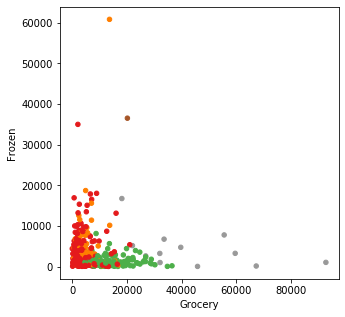

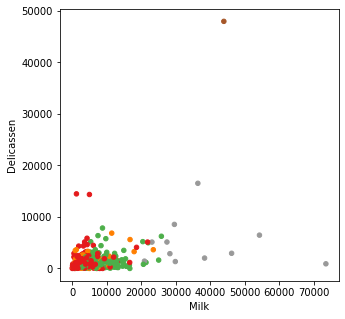

In [7]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(5,5))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=False, figsize=(5,5))

# 
plt.show()
plt.close()